# Librerias

In [ ]:
!pip install Bio
import numpy as np
from Bio import SeqIO
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
from Bio.SeqIO.QualityIO import FastqGeneralIterator
import Bio.SearchIO as bpio

     |████████████████████████████████| 2.3MB 2.5MB/s 


# Objetivo 1

In [ ]:
# Ejercicio 1 a)

# Lo primero es levantar las dos secuencias (seq1 y seq2) luego convertirlas a formato “String”
# Ahora lo que vamos a hacer es usar “numpy” para construir una matriz (el dot-plot) que tenga:
# 0=mismatch, 1=match

# Archivos tp
#seq1 = SeqIO.read("seq1.fasta", "fasta")
#seq2 = SeqIO.read("seq2.fasta", "fasta")
#seq1_string = str(seq1.seq)
#seq2_string = str(seq2.seq)
# Ejemplo pequeño
seq1_ex="ATTCGCATA"
seq2_ex="ATACGCATC"

# Cree una matriz de ceros (de dimensión de acuerdo a las longitudes de seq1 y se2)
# y luego recorramos todas las casillas poniendo 1 donde hay un match (consejo pruebe
# con una matriz más pequeña y luego vaya por la completa)

def dotplot(sec1,sec2):
  
  matriz=np.zeros((len(sec1),len(sec2)))
  i=0
  for base_seq1 in sec1:
    j=0
    for base_seq2 in sec2:
      if base_seq1 == base_seq2:
        matriz[i][j] = 1
      j=j+1
    i=i+1
  return matriz

salida=dotplot(seq1_ex,seq2_ex)
print(salida)

#salida2=dotplot(seq1_string, seq2_string)
#print(salida2)



[[1. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 1. 0. 0. 0. 1. 0. 0.]]


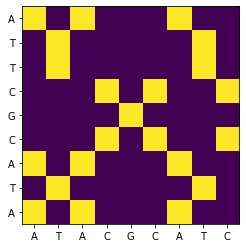

In [ ]:
# Ejercicio 1 continuacion
# Analicè la matriz obtenida (intente graficarla, para eso vea la nota)

df = pd.DataFrame(salida)
#print(df)
dotplot=plt.imshow(np.array(salida))
xt=plt.xticks(np.arange(len(list(seq2_ex))),list(seq2_ex))
yt=plt.yticks(np.arange(len(list(seq1_ex))),list(seq1_ex))
plt.show()

In [ ]:
# Ejercicio 1 b) Arranco con algo y vamos viendo como queda, a ustedes les parece que esto es lo que pedia?
seq1_ex="ATTCGCATA"
seq2_ex="ATACGCATC"  
def dotplot_ventana(sec1,sec2, WindowsSize = 1):
  
  matriz=np.zeros((len(sec1)- WindowsSize + 1,len(sec2)- WindowsSize + 1))
  
  for i in range(len(sec1)- WindowsSize + 1):
    for j in range(len(sec2)- WindowsSize + 1):
      for l in range(WindowsSize):
        if sec1[i+l] == sec2[j+l]:
          matriz[i][j] += 1
  return matriz
salida=dotplot_ventana(seq1_ex,seq2_ex)
print(salida)
salida2=dotplot_ventana(seq1_ex,seq2_ex, WindowsSize = 3)
print(salida2)


#Recorro las secuencias de forma contigua, sin solapamiento.
def dotplot_ventana_contigua(sec1, sec2, WindowsSize = 3):
  matriz=np.zeros((len(sec1)//WindowsSize,len(sec2)//WindowsSize))
  a=0
  for i in range(0,len(sec1),3):
    sec1_c3 = (sec1[i:i+3])
    b=0
    for j in range(0,len(sec2),3):
      sec2_c3 = (sec2[j:j+3])

      if sec1_c3==sec2_c3:
        matriz[a][b]=1
      b=b+1
    a=a+1

  return matriz

salida3=dotplot_ventana_contigua(seq1_ex, seq2_ex)
print(salida3)

#Recorro las secuencias de forma contigua, sin solapamiento, agregándole score a cada coincidencia de base (cada coincidencia es un +1 en la matriz)
def dotplot_ventana_contigua_score(sec1, sec2, WindowsSize = 3):
  matriz=np.zeros((len(sec1)//WindowsSize,len(sec2)//WindowsSize))
  a=0
  for i in range(0,len(sec1),3):
    sec1_c3 = (sec1[i:i+3])
    b=0
    for j in range(0,len(sec2),3):
      sec2_c3 = (sec2[j:j+3])
      match=0
      for ibase in range(len(sec1_c3)):
          if sec1_c3[ibase]==sec2_c3[ibase]:
            match=match+1
          matriz[a][b]=match
      b=b+1
    a=a+1

  return matriz

salida4=dotplot_ventana_contigua_score(seq1_ex, seq2_ex)
print(salida4)


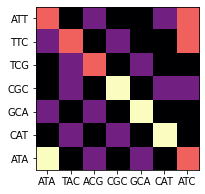

32


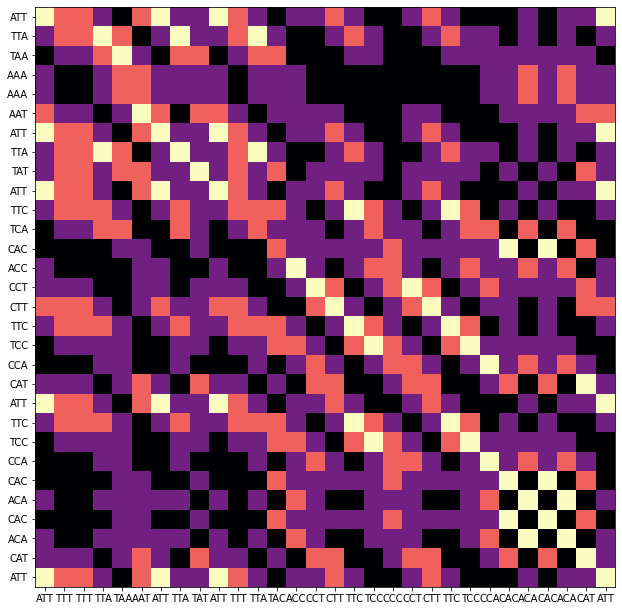

In [ ]:
# Ejercicio 1b continuacion
# Analicè la matriz obtenida (intente graficarla, para eso vea la nota)



def dotplot_ventana_grafico(sec1,sec2, WindowsSize = 1):
  
  matriz=np.zeros((len(sec1)- WindowsSize + 1,len(sec2)- WindowsSize + 1))
  for i in range(len(sec1)- WindowsSize + 1):
    for j in range(len(sec2)- WindowsSize + 1):
      for l in range(WindowsSize):
        if sec1[i+l] == sec2[j+l]:
          matriz[i][j] += 1
  plt.figure(figsize = (len(sec2)/3,len(sec1)/3))
  dotplot=plt.imshow(np.array(salida2))
  ticksX = []
  ticksY = []
  for x in range(len(sec2)- WindowsSize + 1):
    ticksX.append(sec2[x:x + WindowsSize])
  for y in range(len(sec1)- WindowsSize + 1):
    ticksY.append(sec1[y:y + WindowsSize])
  dotplot=plt.imshow(np.array(matriz), cmap = "magma")
  xt=plt.xticks(np.arange(len(ticksX)),ticksX)
  yt=plt.yticks(np.arange(len(ticksY)),ticksY)
  plt.show()

dotplot_ventana_grafico(seq1_ex,seq2_ex, WindowsSize = 3)

secuencia1 = 'ATTAAAATTATTCACCTTCCATTCCACACATT'
secuencia2 = 'ATTTTAATTATTTACCTTCCCTTCCACACATT'
print(len(secuencia1))
dotplot_ventana_grafico(secuencia1,secuencia2, WindowsSize = 3)


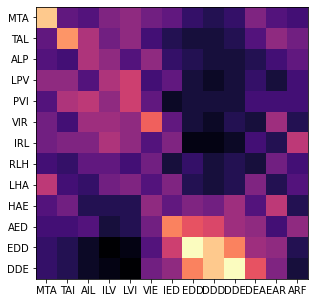

In [ ]:
#1c para arrancar



def dotplot__proteina_ventana_grafico(sec1,sec2, WindowsSize = 1):
  from Bio.SubsMat.MatrixInfo import blosum62
  matriz=np.zeros((len(sec1)- WindowsSize + 1,len(sec2)- WindowsSize + 1))
  for i in range(len(sec1)- WindowsSize + 1):
    for j in range(len(sec2)- WindowsSize + 1):
      for l in range(WindowsSize):
        if (sec1[i+l],sec2[j+l]) in blosum62.keys():
          matriz[i][j] += blosum62[(sec1[i+l],sec2[j+l])]
        else:
          matriz[i][j] += blosum62[(sec2[j+l],sec1[i+l])]
  plt.figure(figsize = (len(sec2)/3,len(sec1)/3))
  dotplot=plt.imshow(np.array(matriz))
  ticksX = []
  ticksY = []
  for x in range(len(sec2)- WindowsSize + 1):
    ticksX.append(sec2[x:x + WindowsSize])
  for y in range(len(sec1)- WindowsSize + 1):
    ticksY.append(sec1[y:y + WindowsSize])
  dotplot=plt.imshow(np.array(matriz), cmap = "magma")
  xt=plt.xticks(np.arange(len(ticksX)),ticksX)
  yt=plt.yticks(np.arange(len(ticksY)),ticksY)
  plt.show()

peptido1 = "MTALPVIRLHAEDDE"
peptido2 = "MTAILVIEDDDEARF"
dotplot__proteina_ventana_grafico(peptido1,peptido2, WindowsSize = 3)



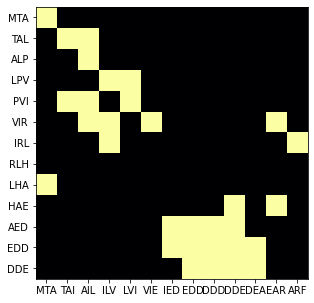

In [ ]:
#1c en blanco y negro

def dotplot_proteina_ventana_grafico_BYN(sec1,sec2, WindowsSize = 1, umbral = 4):
  from Bio.SubsMat.MatrixInfo import blosum62
  matriz=np.zeros((len(sec1)- WindowsSize + 1,len(sec2)- WindowsSize + 1))
  for i in range(len(sec1)- WindowsSize + 1):
    for j in range(len(sec2)- WindowsSize + 1):
      for l in range(WindowsSize):
        if (sec1[i+l],sec2[j+l]) in blosum62.keys():
          matriz[i][j] += blosum62[(sec1[i+l],sec2[j+l])]
        else:
          matriz[i][j] += blosum62[(sec2[j+l],sec1[i+l])]
  plt.figure(figsize = (len(sec2)/3,len(sec1)/3))
  for a in range(len(matriz)):
    for b in range(len(matriz[a])):
      if matriz[a][b] >= umbral:
        matriz[a][b] = 1
      else:
        matriz[a][b] = 0
  dotplot=plt.imshow(np.array(matriz))
  ticksX = []
  ticksY = []
  for x in range(len(sec2)- WindowsSize + 1):
    ticksX.append(sec2[x:x + WindowsSize])
  for y in range(len(sec1)- WindowsSize + 1):
    ticksY.append(sec1[y:y + WindowsSize])
  dotplot=plt.imshow(np.array(matriz), cmap = "magma")
  xt=plt.xticks(np.arange(len(ticksX)),ticksX)
  yt=plt.yticks(np.arange(len(ticksY)),ticksY)
  plt.show()

peptido1 = "MTALPVIRLHAEDDE"
peptido2 = "MTAILVIEDDDEARF"
dotplot_proteina_ventana_grafico_BYN(peptido1,peptido2, WindowsSize = 3, umbral = 2)

In [ ]:
#1c prueba con una proteina real (o un pedazo de ella al menos)

LRRK2_HUMANA = "MASGSCQGCEEDEETLKKLIVRLNNVQEGKQIETLVQILEDLLVFTYSERASKLFQGKNIHVPLLIVLDSYMRVASVQQVGWSLLCKLIEVCPGTMQSLMGPQDVGNDWEVLGVHQLILKMLTVHNASVNLSVIGLKTLDLLLTSGKITLLILDEESDIFMLIFDAMHSFPANDEVQKLGCKALHVLFERVSEEQLTEFVENKDYMILLSALTNFKDEEEIVLHVLHCLHSLAIPCNNVEVLMSGNVRCYNIVVEAMKAFPMSERIQEVSCCLLHRLTLGNFFNILVLNEVHEFVVKAVQQYPENAALQISALSCLALLTETIFLNQDLEEKNENQENDDEGEEDKLFWLEACYKALTWHRKNKHVQEAACWALNNLLMYQNSLHEKIGDEDGHFPAHREVMLSMLMHSSSKEVFQASANALSTLLEQNVNFRKILLSKGIHLNVLELMQKHIHSPEVAESGCKMLNHLFEGSNTSLDIMAAVVPKILTVMKRHETSLPVQLEALRAILHFIVPGMPEESREDTEFHHKLNMVKKQCFKNDIHKLVLAALNRFIGNPGIQKCGLKVISSIVHFPDALEMLSLEGAMDSVLHTLQMYPDDQEIQCLGLSLIGYLITKKNVFIGTGHLLAKILVSSLYRFKDVAEIQTKGFQTILAILKLSASFSKLLVHHSFDLVIFHQMSSNIMEQKDQQFLNLCCKCFAKVAMDDYLKNVMLERACDQNNSIMVECLLLLGADANQAKEGSSLICQVCEKESSPKLVELLLNSGSREQDVRKALTISIGKGDSQIISLLLRRLALDVANNSICLGGFCIGKVEPSWLGPLFPDKTSNLRKQTNIASTLARMVIRYQMKSAVEEGTASGSDGNFSEDVLSKFDEWTFIPDSSMDSVFAQSDDLDSEGSEGSFLVKKKSNSISVGEFYRDAVLQRCSPNLQRHSNSLGPIFDHEDLLKRKRKILSSDDSLRSSKLQSHMRHSDSISSLASEREYITSLDLSANELRDIDALSQKCCISVHLEHLEKLELHQNALTSFPQQLCETLKSLTHLDLHSNKFTSFPSYLLKMSCIANLDVSRNDIGPSVVLDPTVKCPTLKQFNLSYNQLSFVPENLTDVVEKLEQLILEGNKISGICSPLRLKELKILNLSKNHISSLSENFLEACPKVESFSARMNFLAAMPFLPPSMTILKLSQNKFSCIPEAILNLPHLRSLDMSSNDIQYLPGPAHWKSLNLRELLFSHNQISILDLSEKAYLWSRVEKLHLSHNKLKEIPPEIGCLENLTSLDVSYNLELRSFPNEMGKLSKIWDLPLDELHLNFDFKHIGCKAKDIIRFLQQRLKKAVPYNRMKLMIVGNTGSGKTTLLQQLMKTKKSDLGMQSATVGIDVKDWPIQIRDKRKRDLVLNVWDFAGREEFYSTHPHFMTQRALYLAVYDLSKGQAEVDAMKPWLFNIKARASSSPVILVGTHLDVSDEKQRKACMSKITKELLNKRGFPAIRDYHFVNATEESDALAKLRKTIINESLNFKIRDQLVVGQLIPDCYVELEKIILSERKNVPIEFPVIDRKRLLQLVRENQLQLDENELPHAVHFLNESGVLLHFQDPALQLSDLYFVEPKWLCKIMAQILTVKVEGCPKHPKGIISRRDVEKFLSKKRKFPKNYMSQYFKLLEKFQIALPIGEEYLLVPSSLSDHRPVIELPHCENSEIIIRLYEMPYFPMGFWSRLINRLLEISPYMLSGRERALRPNRMYWRQGIYLNWSPEAYCLVGSEVLDNHPESFLKITVPSCRKGCILLGQVVDHIDSLMEEWFPGLLEIDICGEGETLLKKWALYSFNDGEEHQKILLDDLMKKAEEGDLLVNPDQPRLTIPISQIAPDLILADLPRNIMLNNDELEFEQAPEFLLGDGSFGSVYRAAYEGEEVAVKIFNKHTSLRLLRQELVVLCHLHHPSLISLLAAGIRPRMLVMELASKGSLDRLLQQDKASLTRTLQHRIALHVADGLRYLHSAMIIYRDLKPHNVLLFTLYPNAAIIAKIADYGIAQYCCRMGIKTSEGTPGFRAPEVARGNVIYNQQADVYSFGLLLYDILTTGGRIVEGLKFPNEFDELEIQGKLPDPVKEYGCAPWPMVEKLIKQCLKENPQERPTSAQVFDILNSAELVCLTRRILLPKNVIVECMVATHHNSRNASIWLGCGHTDRGQLSFLDLNTEGYTSEEVADSRILCLALVHLPVEKESWIVSGTQSGTLLVINTEDGKKRHTLEKMTDSVTCLYCNSFSKQSKQKNFLLVGTADGKLAIFEDKTVKLKGAAPLKILNIGNVSTPLMCLSESTNSTERNVMWGGCGTKIFSFSNDFTIQKLIETRTSQLFSYAAFSDSNIITVVVDTALYIAKQNSPVVEVWDKKTEKLCGLIDCVHFLREVMVKENKESKHKMSYSGRVKTLCLQKNTALWIGTGGGHILLLDLSTRRLIRVIYNFCNSVRVMMTAQLGSLKNVMLVLGYNRKNTEGTQKQKEIQSCLTVWDINLPHEVQNLEKHIEVRKELAEKMRRTSVE"
LRRK_MOSCA = "MEHPKTGTETALEACDYFVDEVIEASSIRDAREEVRQIKHGELRTAVISGDERTVRVLLAALGTERQIIVNMAPSGANTLLFLACQSGYESITQRLLDAGADGRSHAVTKYSPLYAAVHSGHLGIARLMLDHFPELIQQPTVERWLPLHAACINGHIKLLELLISYSYPDYLYQTYRDEEGQWEWRLPFDANAHDVTGQTSLYIASILGNKQLVGVLLKWQLHCRRTLGDSASSVSTPITPTRKRISFGIQAIMSKLHISGESEGPDDLASQESTECQRCPINVNLLCGAARETALLAAVRGGHLDVVQSLLQHGANPNIVAKPVEDHNDPKCCEEIYGLSNVPIAEACKQRSLAMLDLLLKHGARDDNGTAIGMAITCGDEAILSRLLARRVHPDSDYKINKKGLPTPVEVNVFLPSTSNISYSAMFPNNPTIIDWHSMGSSVQLSVVRVPWMVSGVLLLNPKLQSHPRLNEVALTAITRIDFSHNVLTSIPQELFHLVSLRYLNVAQNKITDLPAPIGQTYGCPVLDELFLQDNQLTTLPAAIFHLPALSILDVSNNKLQQLPFDLWRAPKLRELNVAFNLLRDLPVPPMQTSSSLLSLDKLNLQSFEEPPSNKPRNVTQQRLTHRNLWSATLDITDNDMKWQHEQDLGDGKTAGVGSSQLSSLNIANNLFTSIPAALPCLAVNLTRLNMSYNSLRSMGHVTSYPATLKQLDLSHNEISCWPSLPRITESDPHLLCYSCVQLPEGRDDDYKTASSKGSSSSATSFRASVLKSVCRHRRHLRLEALRTLILADNLLTRIQLSTDDATTLFNESEDADWSVVGVNRSKVIFPNLSMLDMTNNCLKEIPASLHELSSLSVLNISGNVNITELPPHLGLLSRLWNLNTRGCLLQEPLRSMIESKKHKTMDIVGYLKSIYEDAQPYARMKLMVVGVAGIGKSTLLDLLRQGAGSGSSSSSHRSRASENHWAKRMGHARSTSRSHRHSSASSANISTVGVDIGTWICEKRKRAPGSHGPVVFRTWDFGGQKEYYATHQYFLSKRSLYLVLWRISDGHKGLAELLQWLGNIQARAPNSPVIIVGTHFDAVGESISPQKAEQLQQLIREKFIAIPDAEKIGLPRVIDSIEISCRTLHNIHLLANIIYDTAMQLRSPGSKEPMLLQKIPASYIALEDIVNVIACNLRAAGRDPVLDGEQYKRLVTEQMRLHNYKSFRDAAELQQATTWCHENGVLLHYDDATLRDYYFLDPQWLCDMLAHVVTVREINPFAPTGVMKLDDLQMLFRSVQVQGNGNRSYIVSLLNKFEVALTWDSRTLLIPSLLPSQEAATPNSGSTVKLSQRSRGRSLGCSVSQEVNLNNLIYEQRSAPSSSSSSASVSQGLRRILLMTYFPSGFWSRLITRILADEQIIEAIRGVYMASQDYADFDLRTSLEQDTQWNLWQTGLALYYGPILIFKIWEVPFQKTERTQPFRTDGNRFKLKQDGIWSDVNLSSSSILEVYFPLYEVNISQEVDDNERQLLAEIRPHMSQVAKLLALTVDHIDLLLEDWYPSLGTRFVHTSEGRFLITRLVLCPRCLWKLQLQQNNEPSDREVPPVGCNRPSRSSRRGAGAYFLHGVGDPGEDGALNVFSAYLNATARRERRSEDSLGAGSDADSGVGPDSAGSSRNTSVDGHPGYHLPDNSNVCYAWMIEECILSVYNQSKISCPVHLEQSMAQLAPDVIFADIPDKHTIPSECIIKGSLLGRGAFGFVFKANCKVRGARSFKPVAMKMLQPVPPGARAKESALMAFKVAVGKWDRDPLQHSCKAYCTARQELAVLLTLKHPNIVPLVGICIKPLALVLELAPLGGLDALLRHYRRSGAHMGPHTFQTLVLQAARAIEYLHRRRIIYRDLKSENVLVWELPQPHTEDSPRNLVHIKIADYGISRQTAPSGAKGFGGTEGFMAPEIIRYNGEEEYTEKVDCFSFGMFIYENISLRQPFEGHESIKECILEGSRPALTQRETQFPTCCLDLMVLCWHEQPRRRPTASQIVSILSAPECIHLLDVVAMPHSEKIVCGVFQSLVGMGDDERCGLELWLPSFGSRIDILDCSPSGSLLQCNSISCSPQPQVAPPKTPENGANSRARSAQRLPKMNMLCCCLVGEAIWMGDVSGNLHAYSTSTYAHLFSYMLDPNIKSAVISLVYMEKIARVAVGTHNGRVFLVDATQMPSNCAFAEGSFVLTEICSGFVLHAACSVVVDGIYELWCGEIAGKINVFPLNENGVSGHQALCHSEEPNLIEDVKVARMCSNESHVFSCLYPGCMVYQWDVISKRIENKLDCSKLLPCSESLQSIAIDEHVNLIKCQISALAAHNSELYIGTTWGCLIVAELHTLRPISVFRPYENEIKSIITLSKDNVPLIATIGRRYRSLISRYVDSAESSTKSSAVSTPTHGAAKSVPPADVDNHIHCLLWRAKHWT"
#dotplot_proteina_ventana_grafico_BYN(LRRK2_HUMANA[1000:2200],LRRK2_MOSCA[500:2000], WindowsSize = 6, umbral = 6)
dotplot_proteina_ventana_grafico_BYN(LRRK2_HUMANA[1100:1700],LRRK_MOSCA[600:1400], WindowsSize = 12, umbral = 10)
#dotplot__proteina_ventana_grafico(LRRK2_HUMANA[1100:1500],LRRK_MOSCA[600:1000], WindowsSize = 6)

In [ ]:
# Principio objetivo 1d

import numpy as np
secuencia1 = list('ATTAAAATTATTCACCTTCCATTCCACACATT')
secuencia2 = list('ATTTTAATTATTTACCTTCCCTTCCACACATT')
# Para cambiar las secuencias hay que editar la parte de acá arriba (tienen que ser del mismo tamaño).
secuencia1_lista = [secuencia1[i:i+3] for i in range(0,len(secuencia1), 3)]
secuencia2_lista = [secuencia2[i:i+3] for i in range(0,len(secuencia2), 3)]
score = 0
lista_scores = []
lista_scores_max = []
def dotplot(secuencia1,secuencia2):
    i = 0
    j = 0
    matriz = np.zeros((len(secuencia1),len(secuencia2)))
    for base1 in secuencia1:
        for base2 in secuencia2:
            if base2 == base1:
                matriz[i][j] = 1
            j = j + 1
        j = 0
        i = i+1
    return matriz
# Lo de arriba sería la función que crea la matriz, si está un poco cambiada es porque quise practicar hacerla
# desde 0 por mi cuenta, pero funcionaría igual (se puede borrar y dejar la original)

for i in range(len(secuencia1_lista)):
    secuencia1 = secuencia1_lista[i]
    secuencia2 = secuencia2_lista[i]
    
    matriz = dotplot(secuencia1,secuencia2)
    #print(matriz)
    
    i = 0
    j = 0
# i y j son las posiciones dentro de la matriz (como en la función)    
    
    for pos in range(len(secuencia1)*len(secuencia2)):
        
    
# el loop dura la cantidad de posiciones totales de la matriz (tendría que pasar por cada posición)    
        if  matriz[i][j] == 1:
            while matriz[i][j] == 1 :
                
                score = score + 1
                if score == 1:
                    i2 = i
                    j2 = j
                i = i + 1 
                j = j + 1
                if i == len(secuencia1) or j == len(secuencia1):
                    break
# si encuentra un 1 dentro de la matriz, empieza a avanzar en diagonal sumando 1 punto al score
# por cada 1 que se encuentra en la diagonal, para cuando se encuentra con un 0.
                
            
                                                                        
            lista_scores.append(score)
            score = 0
            i = i2 +1
            j = j2 
# Luego se reestablece la posición anterior, y vuelve a avanzar primero hacia la fila de abajo.           
            if i == len(secuencia1):
                j = j+1
                i = 0
        else:
            if matriz[i][j] == 0:
                #print('Score 0')
                i = i + 1
# Cada vez que se encuentra con un 0 avanza una posición hacia abajo. 
                if i == len(secuencia1):
                    j = j+1
                    i = 0
            lista_scores.append(score)
        #print(lista_scores)
# Cuando llegó abajo de todo, la posición i (que va de arriba hacia abajo) vuelve a 0, y la posición j,
# que va de izquierda a derecha se mueve una posición hacia la derecha.
        
# Se hizo una lista donde van todos los scores posibles de cada diagonal, se resetea después de pasar por cada subsecuencia.
# Se agrega a otra lista (le puse lista_scores_max) cada valor maximo de score obtenido.
    
    
    if max(lista_scores)>=2:
        for i in range(len(secuencia1)):
            print(secuencia1[i]+'-'+secuencia2[i])
        
        print('Total de coincidencias consecutivas: '+str(max(lista_scores)))
        lista_scores_max.append(max(lista_scores))
        print('Match')
        print('')
    else:
        for i in range(len(secuencia1)):
            print(secuencia1[i]+'-'+secuencia2[i])
        
        print('Total de coincidencias consecutivas: '+str(max(lista_scores)))
        print('No hay match')
        print('')
    lista_scores = []
print('')
print('El score final es de:'+ ' '+  str(len(lista_scores_max)))
# El score final se calcula como el largo de la lista final de scores maximos mayores a 2 (2 coinicidencias de 3 por lo menos)
#print(lista_scores_max)  
# Este programa suma las coincidencias consecutivas (si coinciden 2 de 3 bases pero no son consecutivas, no las suma
# para el score de la subsecuencia), funciona recorriendo 
# la matriz (arma una cada 3 letras) en todas las posiciones, y si encuentra un 1 sigue la diagonal.
# Solo funciona con secuencias del mismo tamaño y no puede hacer nada frente a las inserciones.


A-A
T-T
T-T
Total de coincidencias consecutivas: 3
Match

A-T
A-T
A-A
Total de coincidencias consecutivas: 1
No hay match

A-A
T-T
T-T
Total de coincidencias consecutivas: 3
Match

A-A
T-T
T-T
Total de coincidencias consecutivas: 3
Match

C-T
A-A
C-C
Total de coincidencias consecutivas: 2
Match

C-C
T-T
T-T
Total de coincidencias consecutivas: 3
Match

C-C
C-C
A-C
Total de coincidencias consecutivas: 2
Match

T-T
T-T
C-C
Total de coincidencias consecutivas: 3
Match

C-C
A-A
C-C
Total de coincidencias consecutivas: 3
Match

A-A
C-C
A-A
Total de coincidencias consecutivas: 3
Match

T-T
T-T
Total de coincidencias consecutivas: 2
Match


El score final es de: 10


# Objetivo 2

In [ ]:
#Lo hago aca para que lo tengamos todos, pero pueden hacerlo en terminal
!sudo apt install ncbi-blast+
!gunzip  VFDB_setA_pro.fas.gz
!makeblastdb -dbtype prot -in VFDB_setA_pro.fas

In [ ]:
!blastp -query drra.fasta -db VFDB_setA_pro.fas -evalue 1e-5

In [ ]:
#Uso -oufmt 5 para dar formato al output.. sino no le gusta al parse de Bio..
!blastp -query "drra.fasta" -db VFDB_setA_pro.fas -evalue 1e-5 -outfmt 5  > "blast_A_drra.xml"

In [ ]:
#Use un .xml y blast-xml porque me dice que ya no brinda soporte para blast-text..
resultados=list(bpio.parse("blast_A_drra.xml", 'blast-xml'))
for resultado in resultados:
  print(resultado)

Program: blastp (2.6.0+)
  Query: sp|Q29ST3|DRRA_LEGPN (647)
         Multifunctional virulence effector protein DrrA OS=Legionella pneumo...
 Target: VFDB_setA_pro.fas
   Hits: ----  -----  ----------------------------------------------------------
            #  # HSP  ID + description
         ----  -----  ----------------------------------------------------------
            0      1  VFG018236(gb|YP_096471)  (sidM/drrA) Dot/Icm type IV se...
            1      1  VFG041262(gb|YP_095134)  (lem4/smdA) Dot/Icm type IV se...
            2      1  VFG045589(gb|YP_096608)  (lem28) Dot/Icm type IV secret...


In [ ]:
for r in resultados:
  for m in r:
    print(m)
    print("-"*80)

Query: sp|Q29ST3|DRRA_LEGPN
       Multifunctional virulence effector protein DrrA OS=Legionella pneumoph...
  Hit: VFG018236(gb|YP_096471) (647)
       (sidM/drrA) Dot/Icm type IV secretion system effector DrrA/SidM guanin...
 HSPs: ----  --------  ---------  ------  ---------------  ---------------------
          #   E-value  Bit score    Span      Query range              Hit range
       ----  --------  ---------  ------  ---------------  ---------------------
          0         0    1333.16     647          [0:647]                [0:647]
--------------------------------------------------------------------------------
Query: sp|Q29ST3|DRRA_LEGPN
       Multifunctional virulence effector protein DrrA OS=Legionella pneumoph...
  Hit: VFG041262(gb|YP_095134) (322)
       (lem4/smdA) Dot/Icm type IV secretion system effector Lem4/SmdA [Dot/I...
 HSPs: ----  --------  ---------  ------  ---------------  ---------------------
          #   E-value  Bit score    Span      Query range   

In [ ]:
for resultado in resultados:
  for r in resultado:
    for m in r:
      print("id: {} evalue: {}".format(r.id, m.evalue))

id: VFG018236(gb|YP_096471) evalue: 0.0
id: VFG041262(gb|YP_095134) evalue: 4.953e-10
id: VFG045589(gb|YP_096608) evalue: 1.84136e-07


In [ ]:
for r in resultado:
  print(r.description)

(sidM/drrA) Dot/Icm type IV secretion system effector DrrA/SidM guanine nucleotide exchange factor (GEF) [Dot/Icm (SS047)] [Legionella pneumophila subsp. pneumophila str. Philadelphia 1]
(lem4/smdA) Dot/Icm type IV secretion system effector Lem4/SmdA [Dot/Icm (SS047)] [Legionella pneumophila subsp. pneumophila str. Philadelphia 1]
(lem28) Dot/Icm type IV secretion system effector Lem28 [Dot/Icm (VF0156)] [Legionella pneumophila subsp. pneumophila str. Philadelphia 1]


In [ ]:
#Bueno, ahora si ejercicio 2)a)  Parsear y analizar salida de BLAST

import Bio.SearchIO as bpio
resultados=list(bpio.parse('xml_drra_setA_blastp', 'blast-xml'))
for resultado in resultados:
    for hit in resultado:
        for hsp in hit:
             print("Query:" + hit.query_id,"Hit:" + hit.id, "Ident:" + str(hsp.aln_span),"E-value:" +str(hsp.evalue), "Cov_query:"+ str(hsp.query_range),"Cov_hit:"+ str(hsp.hit_range),"Specie_hit:"+ hit.description)



Query:sp|Q29ST3|DRRA_LEGPN Hit:VFG018236(gb|YP_096471) Ident:647 E-value:0.0 Cov_query:(0, 647) Cov_hit:(0, 647) Specie_hit:(sidM/drrA) Dot/Icm type IV secretion system effector DrrA/SidM guanine nucleotide exchange factor (GEF) [Dot/Icm (SS047)] [Legionella pneumophila subsp. pneumophila str. Philadelphia 1]
Query:sp|Q29ST3|DRRA_LEGPN Hit:VFG041262(gb|YP_095134) Ident:129 E-value:4.953e-10 Cov_query:(512, 638) Cov_hit:(191, 316) Specie_hit:(lem4/smdA) Dot/Icm type IV secretion system effector Lem4/SmdA [Dot/Icm (SS047)] [Legionella pneumophila subsp. pneumophila str. Philadelphia 1]
Query:sp|Q29ST3|DRRA_LEGPN Hit:VFG045589(gb|YP_096608) Ident:81 E-value:1.84136e-07 Cov_query:(555, 636) Cov_hit:(345, 426) Specie_hit:(lem28) Dot/Icm type IV secretion system effector Lem28 [Dot/Icm (VF0156)] [Legionella pneumophila subsp. pneumophila str. Philadelphia 1]


In [ ]:
#Armamos los indices
!gunzip  VFDB_setA_pro.fas.gz
!makeblastdb -dbtype prot -in VFDB_setA_pro.fas
!gunzip  VFDB_setB_pro.fas.gz
!makeblastdb -dbtype prot -in VFDB_setB_pro.fas


In [ ]:
def resultados_blastp_tabla(genes, bases, evalue, info_completa = True):
  Archivos = []
  for gen in genes:
    for base in bases:
      query = gen + ".fasta"
      archivo = gen + "_" + base + ".xml"
      base_ = base + "_pro.fas"
      Archivos.append([archivo, gen, base])  
      !blastp -query $query -db $base_ -evalue $evalue -outfmt 5  > $archivo
  Lista1 = []
  for archivo in Archivos:
    resultados=list(bpio.parse(archivo[0], 'blast-xml'))
    Lista2 = [archivo]
    for resultado in resultados:
      for hit in resultado:
        for hsp in hit:
          #print("id: {} evalue: {}".format(hit.id, hsp.evalue))
          if info_completa:
            Lista1.append([archivo[2], hit.query_id, hit.id, hsp.aln_span, hsp.evalue, hsp.query_range, hsp.hit_range, hit.description])
          else:
            Lista2.append((hit.id, hsp.evalue))
    #Lista1.append(Lista2)
  for lista in Lista1:
    if len(lista) == 1:
      print("{} no tuvo alineamientos significativos contra la base {}".format(lista[0][1], lista[0][2]))
  col = ["base","Query","Hit", "Ident","E-value", "Cov_query","Cov_hit","Specie_hit"]
  
  df = pd.DataFrame(Lista1, columns = col)
  return df


In [ ]:
genes = ["MP2K7", "NDK", "drra"]
bases = ["VFDB_setA", "VFDB_setB"]
resultados_blastp_tabla(genes, bases, 1e-5)

,base,Query,Hit,Ident,E-value,Cov_query,Cov_hit,Specie_hit
0,VFDB_setA,sp|O14733|MP2K7_HUMAN,VFG002060(gb|NP_248764),252,7.009920e-19,"(124, 368)","(12, 248)",(ppkA) serine/threonine protein kinase PpkA [H...
1,VFDB_setA,sp|O14733|MP2K7_HUMAN,VFG002148(gb|NP_220192),156,5.163550e-13,"(221, 368)","(116, 258)",(pkn5) serine/threonine protein kinase [TTSS (...
2,VFDB_setA,sp|O14733|MP2K7_HUMAN,VFG041279(gb|YP_095512),93,7.900050e-09,"(220, 309)","(200, 286)",(legK1) Dot/Icm type IV secretion system effec...
3,VFDB_setB,sp|O14733|MP2K7_HUMAN,VFG019987(gi:218888819),252,1.562080e-18,"(124, 368)","(12, 248)",(ppkA) serine/threonine protein kinase PpkA [H...
4,VFDB_setB,sp|O14733|MP2K7_HUMAN,VFG015386(gi:152984686),252,2.881390e-18,"(124, 368)","(12, 248)",(ppkA) serine/threonine protein kinase PpkA [H...
5,VFDB_setB,sp|O14733|MP2K7_HUMAN,VFG002060(gb|NP_248764),252,6.301530e-18,"(124, 368)","(12, 248)",(ppkA) serine/threonine protein kinase PpkA [H...
6,VFDB_setB,sp|O14733|MP2K7_HUMAN,VFG015387(gi:116054435),252,7.019240e-18,"(124, 368)","(12, 248)",(ppkA) serine/threonine protein kinase PpkA [H...
7,VFDB_setB,sp|O14733|MP2K7_HUMAN,VFG019988(gi:229593375),262,1.651510e-17,"(123, 376)","(11, 257)",(ppkA) putative serine/threonine protein kinas...
8,VFDB_setB,sp|O14733|MP2K7_HUMAN,VFG015390(gi:70733361),181,7.173330e-17,"(192, 368)","(63, 230)",(ppkA) ppkA-related protein [Hcp secretion isl...
9,VFDB_setB,sp|O14733|MP2K7_HUMAN,VFG008410(gi:383307979),238,1.593440e-15,"(123, 341)","(22, 247)",(pknG) serine/threonine protein kinase [Protei...


In [ ]:
#2b) Agregue un módulo que indique EXPLÍCITAMENTE si una de las proteínas “query” no obtuvo un hit significativo.
genes = ["MP2K7", "NDK", "drra"]
bases = ["VFDB_setA", "VFDB_setB"]
def resultados_blastp(genes, bases, evalue, info_completa = False):
  Archivos = []
  for gen in genes:
    for base in bases:
      query = gen + ".fasta"
      archivo = gen + "_" + base + ".xml"
      base_ = base + "_pro.fas"
      Archivos.append([archivo, gen, base])  
      !blastp -query $query -db $base_ -evalue $evalue -outfmt 5  > $archivo
  Lista1 = []
  for archivo in Archivos:
    resultados=list(bpio.parse(archivo[0], 'blast-xml'))
    Lista2 = [archivo]
    for resultado in resultados:
      for hit in resultado:
        for hsp in hit:
          #print("id: {} evalue: {}".format(hit.id, hsp.evalue))
          if info_completa:
            Lista2.append(hit)
          else:
            Lista2.append((hit.id, hsp.evalue))
    Lista1.append(Lista2)
  for lista in Lista1:
    if len(lista) == 1:
      print("{} no tuvo alineamientos significativos contra la base {}".format(lista[0][1], lista[0][2]))
  return Lista1

In [ ]:
alineamientos = resultados_blastp(genes, bases, 1e-5, info_completa= True)

NDK no tuvo alineamientos significativos contra la base VFDB_setA


In [ ]:
for hit in alineamientos[0]:
  print(hit)

['MP2K7_VFDB_setA.xml', 'MP2K7', 'VFDB_setA']
Query: sp|O14733|MP2K7_HUMAN
       Dual specificity mitogen-activated protein kinase kinase 7 OS=Homo sap...
  Hit: VFG002060(gb|NP_248764) (1032)
       (ppkA) serine/threonine protein kinase PpkA [HSI-I (VF0334)] [Pseudomo...
 HSPs: ----  --------  ---------  ------  ---------------  ---------------------
          #   E-value  Bit score    Span      Query range              Hit range
       ----  --------  ---------  ------  ---------------  ---------------------
          0     7e-19      86.27     252        [124:368]               [12:248]
Query: sp|O14733|MP2K7_HUMAN
       Dual specificity mitogen-activated protein kinase kinase 7 OS=Homo sap...
  Hit: VFG002148(gb|NP_220192) (490)
       (pkn5) serine/threonine protein kinase [TTSS (VF0344)] [Chlamydia trac...
 HSPs: ----  --------  ---------  ------  ---------------  ---------------------
          #   E-value  Bit score    Span      Query range              Hit range
       ----

# Objetivo 3

In [ ]:
#Objetivo 3 iii) Programar generador de CONTIG
seqs = []
                   
with open("reads4contig.fastq") as in_handle:
    for title, seq, qual in FastqGeneralIterator(in_handle):
        if seq not in seqs:
            seqs.append(seq)      
print(seqs)            
print (len(seqs))
for seq in seqs:
    print(len(seq))

['TGAGCAGGTGAGTGTGTCTCAGGAAGGAAGTGCCTATTCATTATTACTTTTAAATGCAGAAATCTTAGTGCACACTCCTCACTGTAATGAACAGATTTTGA', 'AGAACGTCAAAATCTGTTCATTACAGTGAGGAGTGTGCACTAAGATTTCTGCATTTAAAAGTAATAATGAATAGGCACTTCCTTCCTGAGACACACTCACC', 'GTCTCAGGAAGGAAGTGCCTATTCATTATTACTTTTAAATGCAGAAATCTTAGTGCACACTCCTCACTGTAATGAACAGATTTTGACGTTCTCCTTCCCTT', 'AAGGGAAGGAGAACGTCAAAATCTGTTCATTACAGTGAGGAGTGTGCAATAAGATTTCTGCATTTAAAAGTAATAATGAATAGGCACTTTCTTCCTGAGAC', 'TCTCAGGAAGGAAGTGCCTATTCATTATTACTTTTAAATGCAGAAATCTTAGTGCACACTCCTCACTGTAATGAACAGATTTTGACGTTCTCCTTCCCTTT', 'AGGAAGGAAGTGCCTATTCATTATTACTTTTAAATGCAGAAATCTTAGTGCACACTCCTCACTGTAATGAACAGATTTTGACGTTCTCCTTCCCTTTTTTA', 'GTAAAAAAGGGAAGGAGAACGTCAAAATCTGTTCATTACAGTGAGGAGTGTGCACTAAGATTTCTGCATTTAAAAGTAATAATGAATAGGCACTTCCTTCC', 'GTAAAAAAGGGAAGGAGAACGTCAAAATCTGTTCATTACAGTGAGGAGTGTGCACTAAGATTTCTGCATTTAAAAGTAATAATGAGTAGGCACTTCCTTCC', 'ATTCATTATTACTTTTAAATGCAGAAATCTTAGTGCACACTCCTCACTGTAATGAACAGATTTTGACGTTCTCCTTCCCTTTTTTACATTTGTAAAGTGCT', 'TATTACTTTTAAATGCAGAAATCTTAGTGCACACTCCTCACTGTAATGAACAG

In [ ]:
# Prinicipio objetivo 3 (prueba con 2 secuencias cortas)
import numpy as np
import Bio
lista = []
lista2 = []
identidades = ''
posicion1 = 0
posicion2 = 0
secuencia1_str = 'GTCTTGTGCGCATTGCGGGCGGGATACGTCTCTGGGCGCTCGGGGAAACT'
secuencia2_str = 'CTCTGGGCGCTCGGGGAAACTAATTCCGGGGAAACCGGGGAAACCTTAAC'
lista_secuencias = [secuencia1_str,secuencia2_str]
for i in range(len(secuencia1_str)):
    for j in range(len(secuencia2_str)):
        if secuencia1_str[posicion1] != secuencia2_str[posicion2]:
            posicion2 = posicion2 + 1
            if posicion2 == len(secuencia1_str)-1:
                posicion2 = 0
            continue
        if secuencia1_str[posicion1] == secuencia2_str[posicion2]:
            posicion01 = posicion1
            posicion02 = posicion2
            while secuencia1_str[posicion1] == secuencia2_str[posicion2]:
                identidades = identidades + secuencia1_str[posicion1]
                posicion1 = posicion1 + 1
                posicion2 = posicion2 + 1
                
              
                if posicion2 >= len(secuencia1_str)-1:
                    continue
                if posicion1 >= len(secuencia1_str):
                    posicion1 = 0
            
            
            lista.append(identidades)
            
            posicion1 = posicion01 +1
            posicion2 = posicion02 +1
            if posicion2 >= len(secuencia1_str)-1:
                posicion2 = 0
            identidades = ''
            if posicion1 >= len(secuencia1_str):
                posicion1 = 0
                break
# se buscan las coinicidencias perfectas (todas las posibles) entre ambas secuencias, y se agregan a una lista.

for secuencia in lista:
    for secuencia2 in lista_secuencias:
        if secuencia2.startswith(secuencia):
            lista2.append(secuencia)
# dentro de la lista de coincidencias perfectas se buscan aquellas que se encuentran al inicio de alguna de las 
# secuencias y se agregan a otra lista.

secuencia_consenso = max(lista2, key=len)
print(secuencia_consenso)

# se selecciona la coinicidencia más larga de todas, de las que se encuentran al inicio de alguna de las secuencias. 

for secuencia2 in lista_secuencias:
    print(secuencia2)
    if secuencia2.endswith(secuencia_consenso):
        for secuencia3 in lista_secuencias:
            if secuencia3.startswith(secuencia_consenso):
                secuencia_final = secuencia2 +secuencia3[len(secuencia_consenso):]
print(secuencia_final)

# se arma el contig colocando primero la secuencia que termina con la secuencia consenso, y luego la que empieza,
# quitándole la secuencia consenso.
                
            

ModuleNotFoundError: ignored